<a href="https://colab.research.google.com/github/TheAmirHK/Financial-market-analysis/blob/main/Stock%20price%20forecasting_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import pandas_datareader.data as web
import datetime
from datetime import datetime, date, timedelta
import yfinance as yf
yf.pdr_override() # <== that's all it takes :-)
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , mean_absolute_percentage_error, r2_score, mean_absolute_error

from keras.models import Sequential
from keras.layers import Dense

# For warnings suppression
import warnings
warnings.filterwarnings("ignore")

In [2]:
# The stocks to be analyzed !
stock = ["AAPL"]

# define the number of year to be studied
NYears = 5

# Define the time period of study
end = datetime.today()
start = end - timedelta(days = NYears*365)
# Download stock data
data = pdr.get_data_yahoo(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [3]:
# Split train and test dataset and scale the sets
def split_data_scaled (data , test_size= None):
    input = pd.DataFrame(data)
    input = input.reset_index(drop=True)
    Xtrain_set = np.array(input.Open).reshape(-1, 1)
    Ytrain_set = np.array(input['Adj Close']).reshape(-1, 1)
    scaler = MinMaxScaler()
    scaled_dataset = scaler.fit_transform(Ytrain_set)
    X_train, X_test, y_train, y_test = train_test_split(Xtrain_set, scaled_dataset, test_size=test_size, shuffle=False)
    return X_train, X_test, y_train, y_test, scaler

In [4]:
# Using Neural Network model to predict the future value of a stock price using the opening price of the stock
# Neural Network structure
def Neural_network_model (inputs, outputs):
    n_inputs = np.size(inputs, 1)
    model = Sequential()
    model.add(Dense(128, kernel_initializer='normal', activation='linear'))
    model.add(Dense(128, kernel_initializer='normal', activation='linear'))
    model.add(Dense(128, kernel_initializer='normal', activation='linear'))
    model.add(Dense(1, kernel_initializer='normal', activation = "linear"))
    model.compile( loss='mean_absolute_error', optimizer='adam', metrics=None)
    return model

In [5]:
X_train, X_valid, y_train, y_valid, scaler = split_data_scaled (data , test_size= 0.08)
model = Neural_network_model (X_train, y_train)
history_ = model.fit(X_train, y_train, epochs = 200, validation_data=(X_valid,y_valid), batch_size = 30, verbose =0)

4/4 [==============================] - 0s 3ms/step
NN MAPE value is 0.009


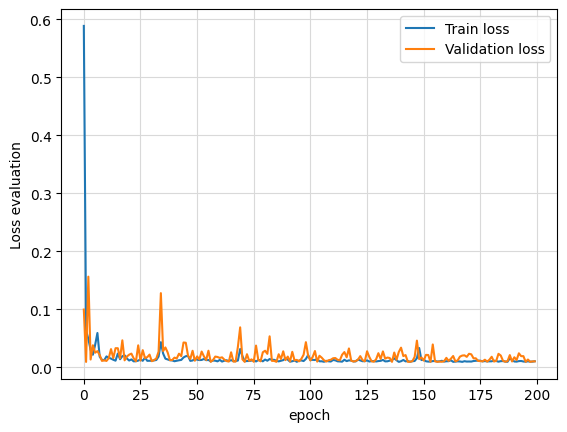

In [6]:
# Evaluate Nueral network model
y_model = model.predict (X_valid)
y_model = scaler.inverse_transform(y_model)
y_test= scaler.inverse_transform(y_valid)
NN_MAPE = mean_absolute_percentage_error(y_model, y_test)
print('NN MAPE value is %0.3f' %NN_MAPE)

plt.plot(history_.history['loss'], label = "Train loss")
plt.plot(history_.history['val_loss'], label = "Validation loss")
plt.legend(loc='upper right', shadow=False)
plt.ylabel('Loss evaluation')
plt.xlabel('epoch')
plt.grid(axis='both', color='0.85')
plt.show()